In [1]:
import pandas as pd 

color = pd.read_csv("./data/colors.csv")
color.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [2]:
color['name'].nunique()

135

In [3]:
color.groupby("is_trans").count()

,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


In [4]:
color.is_trans.value_counts()

is_trans
f    107
t     28
Name: count, dtype: int64

In [5]:
sets = pd.read_csv("./data/sets.csv")
sets.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [7]:
sets.sort_values("year").head()

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


In [10]:
sets[sets['year']==1949]

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


In [11]:
sets.sort_values('num_parts', ascending=False).head()

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922


In [37]:
import matplotlib.pyplot as plt

In [20]:
sets.groupby("year").count().head()

,set_num,name,theme_id,num_parts
year,,,,
1949,5,5,5,5
1950,6,6,6,6
1953,4,4,4,4
1954,14,14,14,14
1955,28,28,28,28


In [22]:
sets_by_years = sets.groupby("year").count()
sets_by_years['set_num'].head()


year
1949     5
1950     6
1953     4
1954    14
1955    28
Name: set_num, dtype: int64

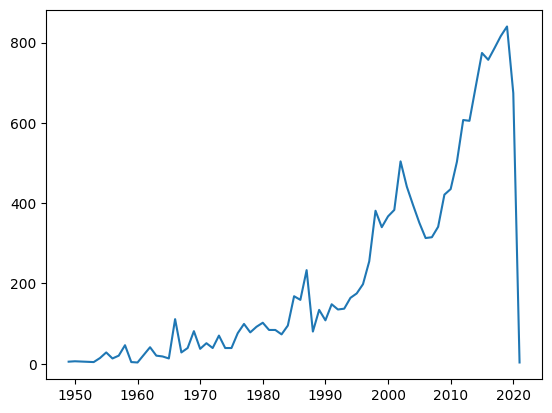

In [23]:
plt.plot(sets_by_years.index, sets_by_years.set_num)

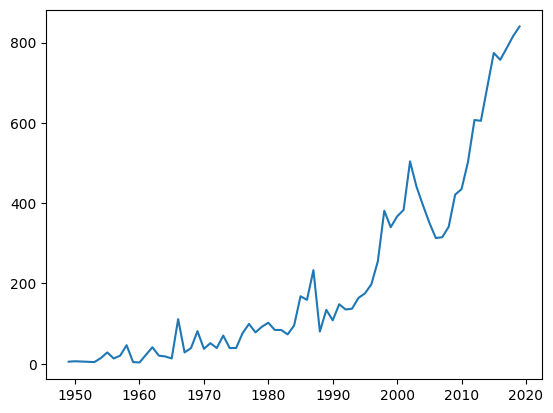

In [24]:
plt.plot(sets_by_years.index[:-2], sets_by_years.set_num[:-2])

In [26]:
sets.groupby("year").agg({'theme_id':pd.Series.nunique})

,theme_id
year,
1949,2
1950,1
1953,2
1954,2
1955,4
...,...
2017,89
2018,93
2019,78


In [29]:
themes_by_year = sets.groupby("year").count()
themes_by_year['theme_id']

year
1949      5
1950      6
1953      4
1954     14
1955     28
       ... 
2017    786
2018    816
2019    840
2020    674
2021      3
Name: theme_id, Length: 71, dtype: int64

In [35]:
themes_by_year= sets.groupby("year").agg({'theme_id':pd.Series.nunique})
themes_by_year.rename(columns={"theme_id":"nr_themes"}, inplace= True)
themes_by_year.head()

,nr_themes
year,
1949,2
1950,1
1953,2
1954,2
1955,4


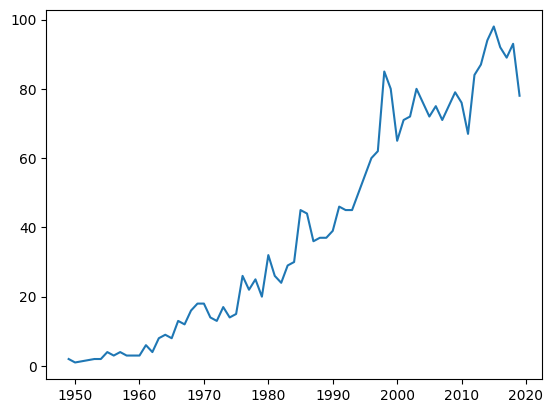

In [40]:
plt.plot(themes_by_year.index[:-2], themes_by_year.nr_themes[:-2])

Text(0, 0.5, 'Number of themes')

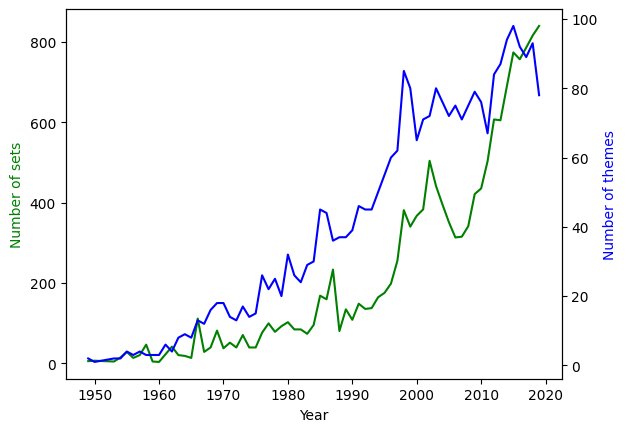

In [44]:
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(sets_by_years.index[:-2], sets_by_years.set_num[:-2], color="g")
ax2.plot(themes_by_year.index[:-2], themes_by_year.nr_themes[:-2], "b")

ax1.set_xlabel("Year")
ax1.set_ylabel("Number of sets", color="green")
ax2.set_ylabel("Number of themes", color="blue")

In [45]:
parts_per_sheet = sets.groupby("year").agg({"num_parts":pd.Series.mean})
parts_per_sheet.head()

,num_parts
year,
1949,99.600000
1950,1.000000
1953,13.500000
1954,12.357143
1955,36.607143


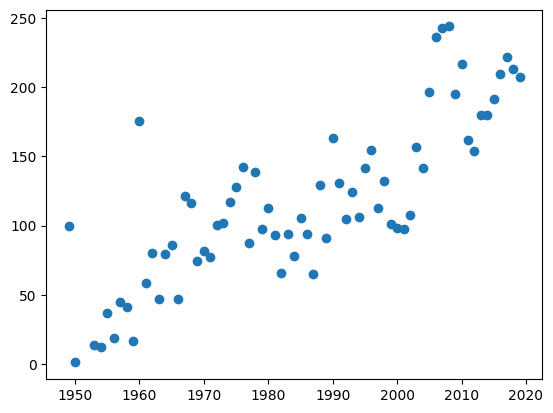

In [47]:
plt.scatter(parts_per_sheet.index[:-2], parts_per_sheet.num_parts[:-2])

<img src="https://i.imgur.com/Sg4lcjx.png">

In [48]:
themes = pd.read_csv("./data/themes.csv")
themes.head()

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


In [49]:
themes.tail()

,id,name,parent_id
591,705,Iron Man,696.0
592,706,Spider-Man,696.0
593,707,X-Men,696.0
594,708,The LEGO Batman Movie,697.0
595,709,LEGO Art,NaN


In [65]:
themes[themes.name=="Star Wars"]

,id,name,parent_id
17,18,Star Wars,1.0
150,158,Star Wars,NaN
174,209,Star Wars,207.0
211,261,Star Wars,258.0


In [64]:
sets[sets.theme_id==158]

,set_num,name,year,theme_id,num_parts
850,11912-1,Star Wars: Build Your Own Adventure,2016,158,73
855,11920-1,Parts for Star Wars Build Your Own Adventure: ...,2019,158,70
1717,20006-1,Clone Turbo Tank - Mini,2008,158,64
1728,20007-1,Republic Attack Cruiser - Mini,2009,158,84
1738,20009-1,AT-TE Walker - Mini,2009,158,94
...,...,...,...,...,...
15686,VP-4,Star Wars Co-Pack of 7101 7111 and 7171,2000,158,0
15689,VP-8,Star Wars Co-Pack of 7130 and 7150,2000,158,0
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52


In [60]:
set_theme_count = sets['theme_id'].value_counts()
set_theme_count.head()



theme_id
158    753
501    656
494    398
435    356
503    329
Name: count, dtype: int64

In [61]:
set_theme_count = pd.DataFrame({"id": set_theme_count.index,"set_count":set_theme_count.values})
set_theme_count.head()

,id,set_count
0,158,753
1,501,656
2,494,398
3,435,356
4,503,329


In [63]:
merged_df = pd.merge(set_theme_count, themes, on="id")
merged_df.head()

,id,set_count,name,parent_id
0,158,753,Star Wars,NaN
1,501,656,Gear,NaN
2,494,398,Friends,NaN
3,435,356,Ninjago,NaN
4,503,329,Key Chain,501.0


<BarContainer object of 10 artists>

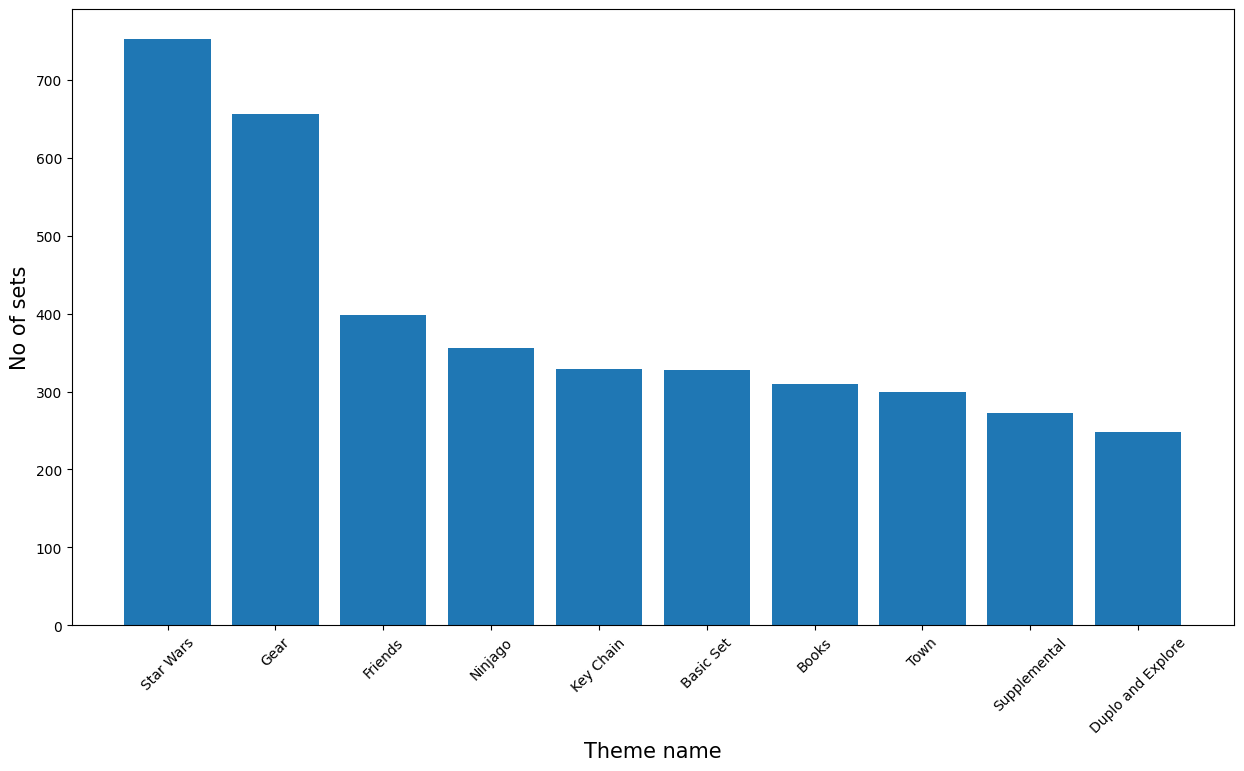

In [72]:
plt.figure(figsize=(15,8))
plt.xticks(fontsize=10, rotation=45)
plt.xlabel("Theme name", fontsize=15)
plt.ylabel("No of sets", fontsize=15)
plt.bar(merged_df.name[:10], merged_df.set_count[:10])